# 2A.ml - Clustering - correction

Ce notebook utilise les données des vélos de Chicago [Divvy Data](https://www.divvybikes.com/system-data). Il s'inspire du challenge créée pour découvrir les habitudes des habitantes de la ville [City Bike](http://www.xavierdupre.fr/app/ensae_projects/helpsphinx/challenges/city_bike.html). L'idée est d'explorer plusieurs algorithmes de clustering et comment trafiquer les données pour les faire marcher.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Les données

Elles ont été prétraitées selon le notebook [Bike Pattern 2](http://www.xavierdupre.fr/app/ensae_projects/helpsphinx/notebooks/city_bike_solution_cluster_start.html). Elles représentent la distribution du nombre de vélos partant (*startdist*) et arrivant (*stopdist*). On utilise le clustering pour découvrir les différents usages des habitants de Chicago avec pour intuition le fait que les habitants de Chicago utilise majoritairement les vélos pour aller et venir entre leur appartement et leur lieu de travail. Cette même idée mais à Paris est illustrée par ce billet de blog : [Busy areas in Paris](http://www.xavierdupre.fr/blog/2013-09-26_nojs.html).

In [3]:
from pyensae.datasource import download_data
file = download_data("features_bike_chicago.zip")
file

['features_bike_chicago.txt']

In [4]:
import pandas
features = pandas.read_csv("features_bike_chicago.txt", sep="\t", encoding="utf-8", low_memory=False, header=[0,1])
features.columns = ["station_id", "station_name", "weekday"] + list(features.columns[3:])
features.head()

,station_id,station_name,weekday,"(startdist, 00:00:00)","(startdist, 00:10:00)","(startdist, 00:20:00)","(startdist, 00:30:00)","(startdist, 00:40:00)","(startdist, 00:50:00)","(startdist, 01:00:00)",...,"(stopdist, 22:20:00)","(stopdist, 22:30:00)","(stopdist, 22:40:00)","(stopdist, 22:50:00)","(stopdist, 23:00:00)","(stopdist, 23:10:00)","(stopdist, 23:20:00)","(stopdist, 23:30:00)","(stopdist, 23:40:00)","(stopdist, 23:50:00)"
0,2.0,Michigan Ave & Balbo Ave,0.0,0.003756,0.000939,0.002817,0.000000,0.000000,0.003756,0.000000,...,0.004381,0.002191,0.004381,0.002191,0.004381,0.004381,0.005476,0.002191,0.000000,0.005476
1,2.0,Michigan Ave & Balbo Ave,1.0,0.000000,0.000000,0.001106,0.001106,0.001106,0.002212,0.000000,...,0.009371,0.012048,0.006693,0.004016,0.005355,0.006693,0.002677,0.000000,0.000000,0.000000
2,2.0,Michigan Ave & Balbo Ave,2.0,0.001357,0.002714,0.000000,0.001357,0.000000,0.005427,0.000000,...,0.002907,0.002907,0.015988,0.005814,0.001453,0.001453,0.011628,0.000000,0.000000,0.007267
3,2.0,Michigan Ave & Balbo Ave,3.0,0.000000,0.004144,0.000000,0.000000,0.002762,0.004144,0.000000,...,0.009274,0.003091,0.003091,0.007728,0.001546,0.003091,0.009274,0.001546,0.007728,0.001546
4,2.0,Michigan Ave & Balbo Ave,4.0,0.000000,0.000000,0.000000,0.002846,0.000000,0.000000,0.000949,...,0.008214,0.001027,0.006160,0.004107,0.015400,0.006160,0.002053,0.006160,0.007187,0.000000


In [5]:
features.shape

(4051, 291)

Les données sont agrégrées par tranche de 10 minutes soit 144 période durant la journée et 288 nombre pour les départs et arrivées de vélos. Cela explique les dimensions de la matrice.

## k-means

On cherche à trouver différentes zones de la villes pour différents usages. Zones de résidences, zones de travail, zone d'amusements et on suppose que les heures de départs et d'arrivées reflètent ces usages. Dans une zone de travail, typiquement le quartier d'affaires, les vélos arriveront principalement le matin et repartiront le soir. Ce sera l'inverse pour une zone de résidences. C'est pour cela que les arrivées et les départs des vélos ont été agrégés par jour de la semaine. La distribution des arrivées risquent d'être bien différentes le week-end.

In [6]:
names = features.columns[3:]

In [7]:
from sklearn.cluster import KMeans
clus = KMeans(10)
clus.fit(features[names])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
pred = clus.predict(features[names])
set(pred)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [9]:
features["cluster"] = pred

In [10]:
features[["cluster", "weekday", "station_id"]].groupby(["cluster", "weekday"]).count()

station_id
cluster weekday            
0       0.0              16
        1.0              11
        2.0              16
        3.0              17
        4.0               7
        5.0               7
        6.0              12
1       4.0               1
        5.0               1
        6.0               2
2       0.0             281
        1.0             322
        2.0             316
        3.0             305
        4.0             285
        5.0              16
        6.0              15
3       0.0               1
        6.0               1
4       0.0             140
        1.0             103
        2.0              98
        3.0             113
        4.0             143
        5.0             545
        6.0             535
5       5.0               1
6       3.0               1
        4.0               1
        5.0               3
        6.0               1
7       0.0             135
        1.0             140
        2.0             148
        3.0             141
        4.0             143
        5.0               7
        6.0              11
8       0.0               2
        1.0               2
        2.0               1
        6.0               2
9       0.0               1
        2.0               1
        6.0               1

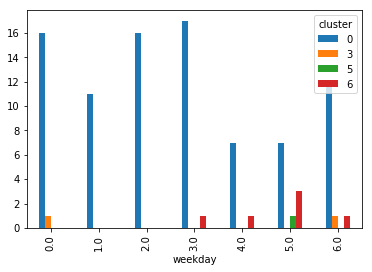

In [11]:
nb = features[["cluster", "weekday", "station_id"]].groupby(["cluster", "weekday"]).count()
nb = nb.reset_index()
nb[nb.cluster.isin([0, 3, 5, 6])].pivot("weekday","cluster", "station_id").plot(kind="bar");

Let's draw the clusters.

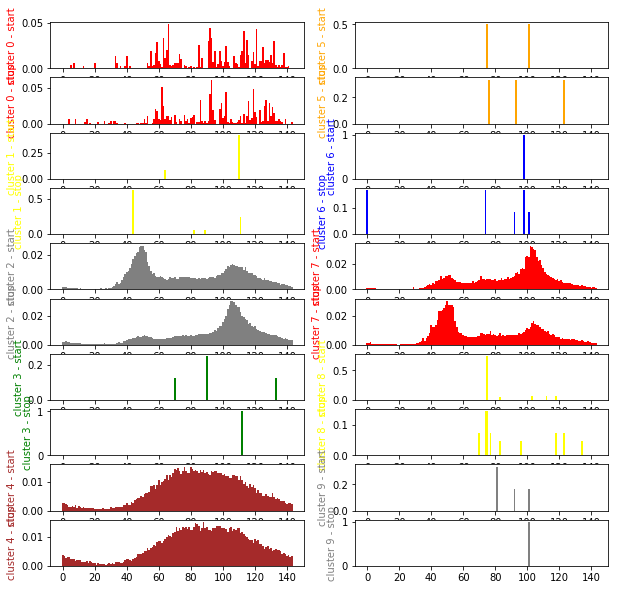

In [12]:
centers = clus.cluster_centers_.T
import matplotlib.pyplot as plt
fig, ax = plt.subplots(centers.shape[1], 2, figsize=(10,10))
nbf = centers.shape[0] // 2
x = list(range(0,nbf))
col = 0
dec = 0
colors = ["red", "yellow", "gray", "green", "brown", "orange", "blue"]
for i in range(centers.shape[1]):
    if 2*i == centers.shape[1]:
        col += 1
        dec += centers.shape[1]    
    color = colors[i%len(colors)]
    ax[2*i-dec, col].bar (x, centers[:nbf,i], width=1.0, color=color)
    ax[2*i-dec, col].set_ylabel("cluster %d - start" % i, color=color)
    ax[2*i+1-dec, col].bar (x, centers[nbf:,i], width=1.0, color=color)
    ax[2*i+1-dec, col].set_ylabel("cluster %d - stop" % i, color=color)

On a réussi à isoler plusieurs usages différents. On voit les départs les matin et les arrivées le soir, le modèle inversé, un autre... Mais les-a-t-on tous trouvés ?

## Exercice 1 : petits clusters

Les petits clusters viennent du fait qu'on impose un nombre de clusters à l'algorithme qui s'efforce de les trouver. Quelques points aberrents sont trop éloignés et isolés du reste des autres. Pour les enlever, on peut simplement réduire le nombre de clusters ou éliminer les points aberrants et les garder comme anomalies.

Les petits clusters sont des stations peu utilisées. Le problème quand on calcule une distribution et qu'on la normalise, typiquement celles des arrivées de vélos à une stations, c'est qu'on perd l'information du nombre de vélos ayant servi à l'estimer. 

L'algorithme [k-means++](https://en.wikipedia.org/wiki/K-means%2B%2B) commence à choisir les points les plus éloignés des uns des autres et cela tombe sur ces stations peu utilisées. Vu le nombre de dimension, 288, les distances sont rapidement très grandes.

Une idée consiste à retirer ces stations peu utilisées ou boucler sur un algorithme du type :

1. Faire tourner les k-means.
2. Retirer les stations dans des clusters isolées.
3. Retour à l'étape 1 jusqu'à ce que cela soit interprétable.

## Exercice 2 : autres types de clustering

In [13]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.1)
pred_dbs = dbs.fit_predict(features[names])
set(pred_dbs)

{-1, 0, 1, 2, 3, 4, 5}

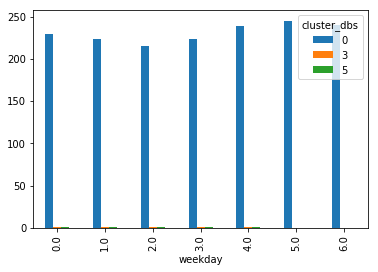

In [14]:
features["cluster_dbs"] = pred_dbs
nbs = features[["cluster_dbs", "weekday", "station_id"]].groupby(["cluster_dbs", "weekday"]).count()
nbs = nbs.reset_index()
nbs[nbs.cluster_dbs.isin([0, 3, 5, 6])].pivot("weekday","cluster_dbs", "station_id").plot(kind="bar");

L'algorithme [dbscan](http://scikit-learn.org/stable/modules/clustering.html#clustering) utilise la proximité des points pour classer les observations. On se retrouve dans le cas où il n'y a pas vraiment de frontière entre les clusters et tous les points se retrouvent associés en un unique cluster excepté quelques points aberrants.

L'algorithme [DBScan](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) ne fonctionne pas sur ces données. Une des raisons que la distance dans un espace vectoriels avec tant de dimensions n'est pas loin d'une information type binaire : différent partout ou identique presque partout. Qu'un vélo arrive 9h10 ou à 9h20, cela n'a pas beaucoup d'importance pour notre problème, pourtant, la distance choisie lui donnera autant d'importance que si le vélo était arrivé à 10h du soir. Pour éviter cela, il faudrait lisser les distributions avec une moyenne mobile.

## Graphes

Un peu de code pour voir la réparition des clusters sur une carte.

In [15]:
piv = features.pivot_table(index=["station_id", "station_name"], 
                           columns="weekday", values="cluster")
piv.head()

,weekday,0.0,1.0,2.0,3.0,4.0,5.0,6.0
station_id,station_name,,,,,,,
2.0,Michigan Ave & Balbo Ave,4.0,2.0,4.0,4.0,4.0,4.0,4.0
3.0,Shedd Aquarium,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4.0,Burnham Harbor,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5.0,State St & Harrison St,2.0,2.0,2.0,2.0,4.0,4.0,4.0
6.0,Dusable Harbor,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [16]:
piv["distincts"] = piv.apply(lambda row: len(set(row[i] for i in range(0,7))), axis=1)

In [17]:
pivn = piv.reset_index()
pivn.head()

weekday,station_id,station_name,0.0,1.0,2.0,3.0,4.0,5.0,6.0,distincts
0,2.0,Michigan Ave & Balbo Ave,4.0,2.0,4.0,4.0,4.0,4.0,4.0,2
1,3.0,Shedd Aquarium,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1
2,4.0,Burnham Harbor,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1
3,5.0,State St & Harrison St,2.0,2.0,2.0,2.0,4.0,4.0,4.0,2
4,6.0,Dusable Harbor,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1


In [18]:
pivn.columns = [str(_).replace(".0", "") for _ in pivn.columns.values]
pivn.head()

,station_id,station_name,0,1,2,3,4,5,6,distincts
0,2.0,Michigan Ave & Balbo Ave,4.0,2.0,4.0,4.0,4.0,4.0,4.0,2
1,3.0,Shedd Aquarium,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1
2,4.0,Burnham Harbor,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1
3,5.0,State St & Harrison St,2.0,2.0,2.0,2.0,4.0,4.0,4.0,2
4,6.0,Dusable Harbor,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1


Une carte des stations un jour de semaine.

In [19]:
from pyensae.datasource import download_data
if False:
    # Provient du site de Chicago
    file = download_data("Divvy_Trips_2016_Q3Q4.zip",
                         url="https://s3.amazonaws.com/divvy-data/tripdata/")
else:
    # Copie au cas où celui-ci tomberait en panne
    file = download_data("Divvy_Trips_2016_Q3.zip")    

In [20]:
stations = pandas.read_csv("Divvy_Stations_2016_Q3.csv")
stations.head()

,id,name,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,41.991178,-87.683593,15,5/12/2015
1,101,63rd St Beach,41.781016,-87.576120,23,4/20/2015
2,109,900 W Harrison St,41.874675,-87.650019,19,8/6/2013
3,21,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15,6/21/2013
4,80,Aberdeen St & Monroe St,41.880420,-87.655599,19,6/26/2013


In [21]:
data = stations.merge(pivn, left_on=["id", "name"],
                      right_on=["station_id", "station_name"], suffixes=('_s', '_c'))
data.sort_values("id").head()

,id,name,latitude,longitude,dpcapacity,online_date,station_id,station_name,0,1,2,3,4,5,6,distincts
357,2,Michigan Ave & Balbo Ave,41.872638,-87.623979,35,5/8/2015,2.0,Michigan Ave & Balbo Ave,4.0,2.0,4.0,4.0,4.0,4.0,4.0,2
456,3,Shedd Aquarium,41.867226,-87.615355,31,4/24/2015,3.0,Shedd Aquarium,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1
53,4,Burnham Harbor,41.856268,-87.613348,23,5/16/2015,4.0,Burnham Harbor,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1
497,5,State St & Harrison St,41.874053,-87.627716,23,6/18/2013,5.0,State St & Harrison St,2.0,2.0,2.0,2.0,4.0,4.0,4.0,2
188,6,Dusable Harbor,41.885042,-87.612795,31,4/24/2015,6.0,Dusable Harbor,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1


In [22]:
def folium_html_stations_map(stations, html_width=None, html_height=None, **kwargs):
    import folium
    from pyensae.notebookhelper import folium_html_map
    map_osm = None
    for key, value in stations:
        x, y = key
        if map_osm is None:
            if "zoom_start" not in kwargs:
                kwargs["zoom_start"] = 11
            if "location" not in kwargs:
                map_osm = folium.Map(location=[x, y], **kwargs)
            else:
                map_osm = folium.Map(kwargs["location"], **kwargs)
        if isinstance(value, tuple):
            name, value = value
            map_osm.add_child(folium.CircleMarker(
                [x, y], popup=name, radius=15, fill_color=value, color=value))
        else:
            map_osm.add_child(folium.CircleMarker(
                [x, y], radius=15, fill_color=value, color=value))
    return folium_html_map(map_osm, width=html_width, height=html_height)

In [23]:
colors = ["red", "yellow", "gray", "green", "brown", "orange", "blue", "black", "pink", "violet"]
for i, c in enumerate(colors):
    print("Cluster {0} is {1}".format(i, c))
xy = []
for els in data.apply(lambda row: (row["latitude"], row["longitude"], row["1"], row["name"]), axis=1):
    try:
        cl = int(els[2])
    except:
        # NaN
        continue
    name = "%s c%d" % (els[3], cl)
    color = colors[cl]
    xy.append( ( (els[0], els[1]), (name, color)))
folium_html_stations_map(xy, width="80%")

Cluster 0 is red
Cluster 1 is yellow
Cluster 2 is gray
Cluster 3 is green
Cluster 4 is brown
Cluster 5 is orange
Cluster 6 is blue
Cluster 7 is black
Cluster 8 is pink
Cluster 9 is violet


<pyensae.notebookhelper.folium_helper.folium_html_map.<locals>.CustomFoliumMap at 0x149c3d72a20>